In [1]:
!pip install sklearn_crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.1 MB/s eta 0:00:00


In [2]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Đường dẫn đến file dữ liệu
file_path = 'vi-chunk.txt'

# Hàm đọc dữ liệu từ file
def read_data(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        sentence = []
        for line in file:
            line = line.strip()
            if len(line) == 0:
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
            else:
                parts = line.split()
                if len(parts) == 3:
                    word, pos_tag, chunk_tag = parts
                    sentence.append((word, pos_tag, chunk_tag))
        if len(sentence) > 0:
            sentences.append(sentence)
    return sentences

# Hàm trích xuất đặc trưng cho từng từ
def word_features(sentence, i):
    word = sentence[i][0]  # Lấy từ từ phần tử đầu tiên của tuple
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        prev_word = sentence[i-1][0]  # Lấy từ từ phần tử đầu tiên của tuple
        features.update({
            '-1:word.lower()': prev_word.lower(),
            '-1:word.istitle()': prev_word.istitle(),
            '-1:word.isupper()': prev_word.isupper(),
        })
    else:
        features['BOS'] = True

    if i < len(sentence)-1:
        next_word = sentence[i+1][0]  # Lấy từ từ phần tử đầu tiên của tuple
        features.update({
            '+1:word.lower()': next_word.lower(),
            '+1:word.istitle()': next_word.istitle(),
            '+1:word.isupper()': next_word.isupper(),
        })
    else:
        features['EOS'] = True

    return features

# Hàm trích xuất đặc trưng cho toàn bộ câu
def sentence_features(sentence):
    return [word_features(sentence, i) for i in range(len(sentence))]

# Hàm trích xuất nhãn chunk cho toàn bộ câu
def sentence_labels(sentence):
    return [label for _, _, label in sentence]

# Đọc dữ liệu từ file
sentences = read_data(file_path)

# Trích xuất đặc trưng và nhãn cho dữ liệu
X = [sentence_features(sentence) for sentence in sentences]
y = [sentence_labels(sentence) for sentence in sentences]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình CRF
crf = sklearn_crfsuite.CRF(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=200, all_possible_transitions=True)
crf.fit(X_train, y_train)

# Dự đoán nhãn chunk trên tập kiểm tra
y_pred = crf.predict(X_test)

# Tính toán và in ra accuracy và F1-score
accuracy = accuracy_score([label for sublist in y_test for label in sublist], [label for sublist in y_pred for label in sublist])
f1 = f1_score([label for sublist in y_test for label in sublist], [label for sublist in y_pred for label in sublist], average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)


Accuracy: 0.8189978956341067
F1-score: 0.8153296827903781


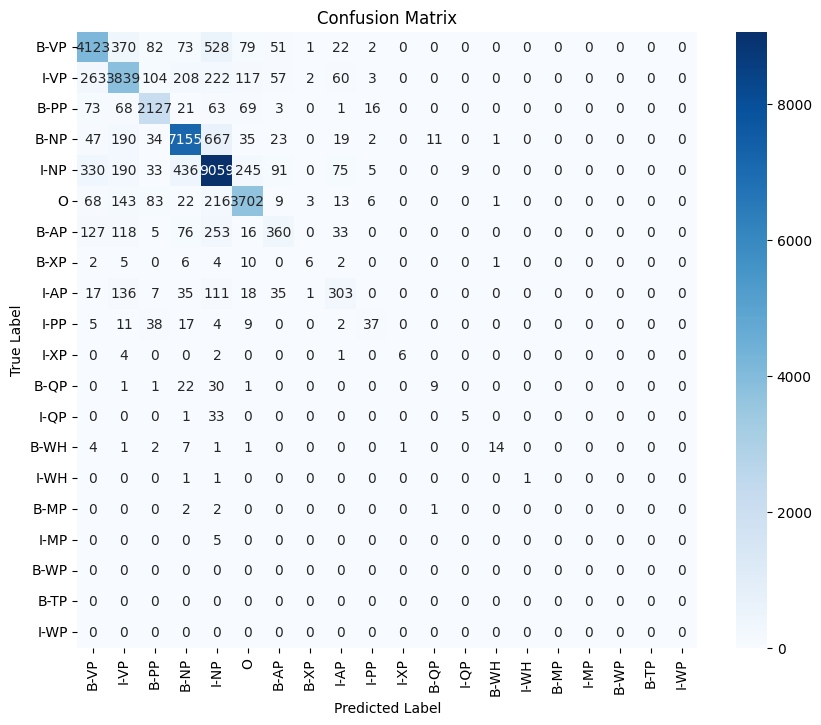

Confusion Matrix:
[[4123  370   82   73  528   79   51    1   22    2    0    0    0    0
     0    0    0    0    0    0]
 [ 263 3839  104  208  222  117   57    2   60    3    0    0    0    0
     0    0    0    0    0    0]
 [  73   68 2127   21   63   69    3    0    1   16    0    0    0    0
     0    0    0    0    0    0]
 [  47  190   34 7155  667   35   23    0   19    2    0   11    0    1
     0    0    0    0    0    0]
 [ 330  190   33  436 9059  245   91    0   75    5    0    0    9    0
     0    0    0    0    0    0]
 [  68  143   83   22  216 3702    9    3   13    6    0    0    0    1
     0    0    0    0    0    0]
 [ 127  118    5   76  253   16  360    0   33    0    0    0    0    0
     0    0    0    0    0    0]
 [   2    5    0    6    4   10    0    6    2    0    0    0    0    1
     0    0    0    0    0    0]
 [  17  136    7   35  111   18   35    1  303    0    0    0    0    0
     0    0    0    0    0    0]
 [   5   11   38   17    4    9    0 

In [ ]:
import sklearn_crfsuite
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Các bước đọc dữ liệu và huấn luyện mô hình như trong mã của bạn đã cung cấp

# Dự đoán nhãn chunk trên tập kiểm tra
y_pred = crf.predict(X_test)

# Lấy tất cả các nhãn
labels = list(crf.classes_)

# Tính toán ma trận confusion
conf_matrix = confusion_matrix([label for sublist in y_test for label in sublist], [label for sublist in y_pred for label in sublist], labels=labels)

# Hiển thị ma trận confusion bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
X_train[0]

[{'bias': 1.0,
  'word.lower()': 'đến',
  'word[-3:]': 'Đến',
  'word[-2:]': 'ến',
  'word.isupper()': False,
  'word.istitle()': True,
  'word.isdigit()': False,
  'BOS': True,
  '+1:word.lower()': 'trường',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False},
 {'bias': 1.0,
  'word.lower()': 'trường',
  'word[-3:]': 'ờng',
  'word[-2:]': 'ng',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  '-1:word.lower()': 'đến',
  '-1:word.istitle()': True,
  '-1:word.isupper()': False,
  '+1:word.lower()': 'trên',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False},
 {'bias': 1.0,
  'word.lower()': 'trên',
  'word[-3:]': 'rên',
  'word[-2:]': 'ên',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  '-1:word.lower()': 'trường',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '+1:word.lower()': 'đôi',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False},
 {'bias': 1.0,
  'word.lower()': 'đôi',
 

In [ ]:
# Câu mới cần dự đoán nhãn chunk
new_sentence = [("Thầy", "N"), ("Huy", "Np"), ("không", "R"), ("dễ_thương", "A"), ("lắm", "T")]

# Trích xuất đặc trưng cho từng từ trong câu mới
new_sentence_features = [word_features(new_sentence, i) for i in range(len(new_sentence))]

# Dự đoán nhãn chunk cho từng từ trong câu mới
new_sentence_pred = crf.predict_single(new_sentence_features)

# In ra câu và nhãn chunk dự đoán
print("Câu mới:", " ".join([word[0] for word in new_sentence]))
print("Nhãn chunk dự đoán:", new_sentence_pred)


Câu mới: Thầy Huy không dễ_thương lắm
Nhãn chunk dự đoán: ['B-NP', 'I-NP', 'B-VP', 'I-VP', 'O']


In [ ]:
# Đường dẫn đến file dữ liệu
file_path = 'vi-chunk.txt'

# Hàm đọc dữ liệu từ file
def read_data(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        sentence = []
        for line in file:
            line = line.strip()
            if len(line) == 0:
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
            else:
                parts = line.split()
                if len(parts) == 3:
                    word, pos_tag, chunk_tag = parts
                    sentence.append((word, pos_tag, chunk_tag))
        if len(sentence) > 0:
            sentences.append(sentence)
    return sentences
# Đọc dữ liệu từ file
sentences = read_data(file_path)
print(sentences)
# Đếm số lượng câu và từ trong bộ dữ liệu
num_sentences = len(sentences)
num_words = sum(len(sentence) for sentence in sentences)

print("Tổng số câu:", num_sentences)
print("Tổng số từ:", num_words)

# Đếm số lượng từ và nhãn chunk khác nhau
unique_words = set()
unique_chunk_labels = set()

for sentence in sentences:
    for word, _, chunk_label in sentence:
        unique_words.add(word)
        unique_chunk_labels.add(chunk_label)

num_unique_words = len(unique_words)
num_unique_chunk_labels = len(unique_chunk_labels)

print("Số từ khác nhau:", num_unique_words)
print("Số nhãn chunk khác nhau:", num_unique_chunk_labels)

# Phân phối của các nhãn chunk
chunk_label_distribution = {}

for sentence in sentences:
    for _, _, chunk_label in sentence:
        chunk_label_distribution[chunk_label] = chunk_label_distribution.get(chunk_label, 0) + 1

print("Phân phối của các nhãn chunk:")
for label, count in chunk_label_distribution.items():
    print(f"- {label}: {count}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

